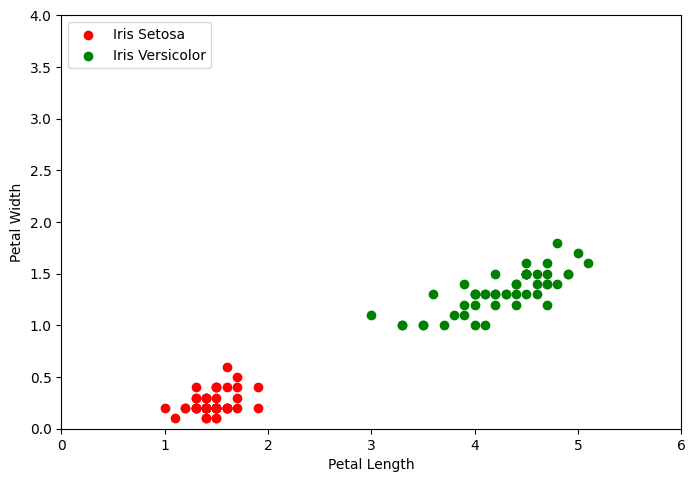

In [2]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
import statistics

iris = datasets.load_iris()
setosa_dataset = []
versicolor_dataset = []
for i in range(50):
  setosa_dataset.append(iris.data[i])

for i in range(50,100):
  versicolor_dataset.append(iris.data[i])

setosa_petal_length = [data[2] for data in setosa_dataset]
setosa_petal_width = [data[3] for data in setosa_dataset]


versicolor_petal_length = [data[2] for data in versicolor_dataset]
versicolor_petal_width = [data[3] for data in versicolor_dataset]

# 4.1
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(setosa_petal_length, setosa_petal_width, c='r', marker="o", label='Iris Setosa')
ax1.scatter(versicolor_petal_length,versicolor_petal_width, c='g', marker="o", label='Iris Versicolor')
ax1.set_ylim(0, 4)
ax1.set_xlim(0, 6)
ax1.set_aspect('equal')
ax1.legend(loc='upper left')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()



Setosa Sample Mean:
[1.462 0.246]
Versicolor Sample Mean:
[4.26  1.326]
Sentosa Covariance Matrix:
[[0.03015918 0.00606939]
 [0.00606939 0.01110612]]
Versicolor Covariance Matrix:
[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]


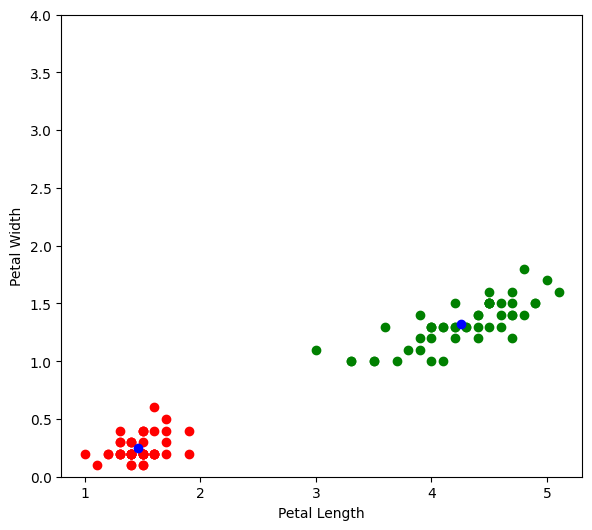

In [3]:
# 4.2
fig, ax2 = plt.subplots(figsize=(8, 6))
setosa_sample_mean = np.array([statistics.mean(setosa_petal_length),statistics.mean(setosa_petal_width)])
versicolor_sample_mean = np.array([statistics.mean(versicolor_petal_length),statistics.mean(versicolor_petal_width)])
print("Setosa Sample Mean:")
print(setosa_sample_mean)
print("Versicolor Sample Mean:")
print(versicolor_sample_mean)
setosa_cov_matrix = np.cov(setosa_petal_length, setosa_petal_width)
versicolor_cov_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print("Sentosa Covariance Matrix:")
print(setosa_cov_matrix)
print("Versicolor Covariance Matrix:")
print(versicolor_cov_matrix)
ax2.scatter(setosa_petal_length, setosa_petal_width, c='r', marker="o", label='Iris Setosa')
ax2.scatter(versicolor_petal_length,versicolor_petal_width, c='g', marker="o", label='Iris Versicolor')
ax2.scatter(setosa_sample_mean[0], setosa_sample_mean[1],c='b',marker='o')
ax2.scatter(versicolor_sample_mean[0], versicolor_sample_mean[1],c='b',marker='o')
ax2.set_ylim(0, 4)
ax2.set_aspect('equal')
# ax2.legend(loc='upper left')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

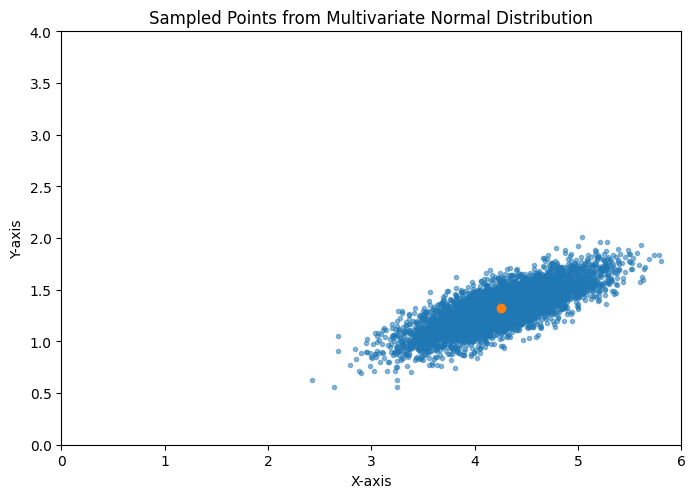

In [4]:
# 4.3
import numpy as np
num_points = 5000

# Generate samples from the multivariate normal distribution
new_sample_points = np.random.multivariate_normal(versicolor_sample_mean, versicolor_cov_matrix , num_points)
# Plot the sampled points
fig, ax3 = plt.subplots(figsize=(8, 6))

ax3.scatter(new_sample_points[:, 0],new_sample_points[:, 1], alpha=0.5, marker='.')
ax3.scatter(versicolor_sample_mean[0], versicolor_sample_mean[1])
plt.title('Sampled Points from Multivariate Normal Distribution')
ax3.set_ylim(0, 4)
ax3.set_xlim(0, 6)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
ax3.set_aspect('equal')
plt.show()

[[-1.92049245 -2.91441002]
 [-0.69040732  8.10695697]]
[-1.92049245 -2.91441002]
[-0.69040732  8.10695697]


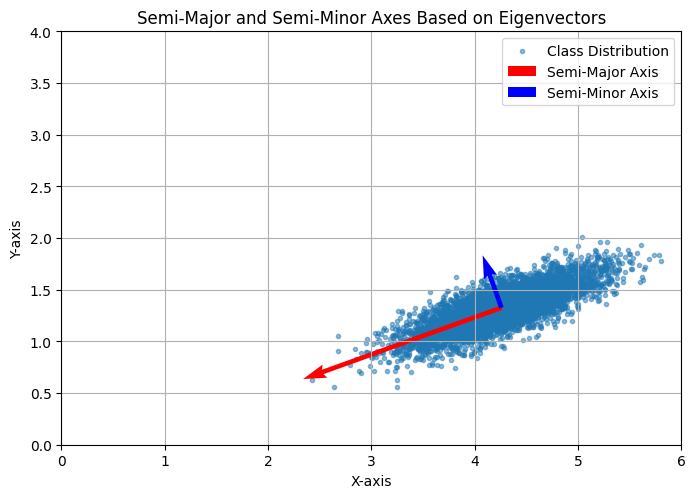

In [5]:
# 4.4
new_cov_matrix = np.cov(new_sample_points, rowvar=False)

# Invert the covariance matrix
inv_new_cov_matrix = np.linalg.inv(new_cov_matrix)
# print(inv_new_cov_matrix)
eigenvalues, eigenvectors = np.linalg.eigh(inv_new_cov_matrix)
# Create a diagonal matrix with eigenvalues
D = np.diag(eigenvalues)
# Form the matrix P with eigenvectors as columns
P = eigenvectors
# Verify the diagonalization: A = P * D * P^(-1)
A_reconstructed = P @ D @ np.linalg.inv(P)
# Check if the reconstruction is accurate within a certain tolerance
tolerance = 1e-10
assert np.allclose(inv_new_cov_matrix, A_reconstructed, atol=tolerance), "Diagonalization check failed!"

# Scale the eigenvectors by the square root of their eigenvalues
scaled_eigenvectors = eigenvectors * np.sqrt(eigenvalues)
print(scaled_eigenvectors)
print(scaled_eigenvectors[0])
print(scaled_eigenvectors[1])

mean_x = versicolor_sample_mean[0]
mean_y = versicolor_sample_mean[1]
# Semi-major and semi-minor axes
semi_major_axis = np.sqrt(eigenvalues[0])
semi_minor_axis = np.sqrt(eigenvalues[1])
fig, ax4 = plt.subplots(figsize=(8, 6))
# # Plot the class distribution
ax4.scatter(new_sample_points[:, 0], new_sample_points[:, 1],alpha=0.5, marker='.',label='Class Distribution')
# Plot the semi-major and semi-minor axes
plt.quiver(mean_x, mean_y, semi_major_axis * eigenvectors[0, 0], semi_major_axis * eigenvectors[1, 0],
           angles='xy', scale_units='xy', scale=1, color='r', label='Semi-Major Axis')
plt.quiver(mean_x, mean_y, semi_minor_axis * eigenvectors[0, 1], semi_minor_axis * eigenvectors[1, 1],
           angles='xy', scale_units='xy', scale=16, color='b', label='Semi-Minor Axis')

# Set axis limits for better visualization
ax4.set_xlim(0, 6)
ax4.set_ylim(0, 4)
ax4.set_aspect('equal')
# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Semi-Major and Semi-Minor Axes Based on Eigenvectors')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

Covariance Matrix after transform:
[[ 1.00000000e+00 -1.11222183e-16]
 [-1.11222183e-16  1.00000000e+00]]


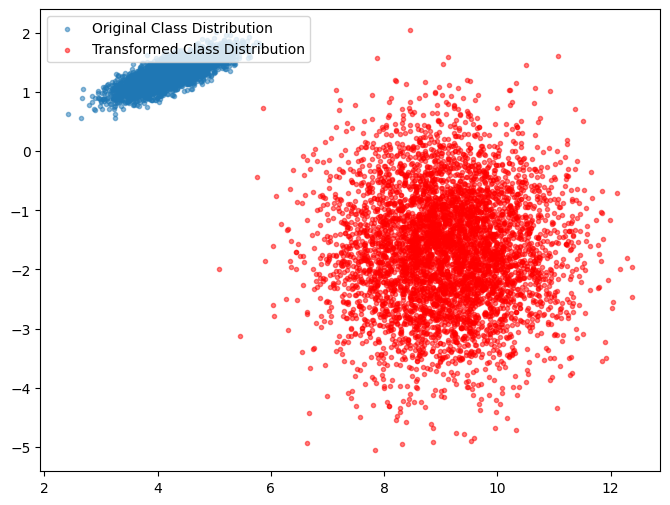

In [17]:
#4.5
fig, ax5 = plt.subplots(figsize=(8, 6))
data_points_circle = new_sample_points
ax5.scatter(data_points_circle[:, 0], data_points_circle[:, 1],alpha=0.5, marker='.',label='Original Class Distribution')
# Create the scaling matrix
eigenvalues, eigenvectors = np.linalg.eig(new_cov_matrix)
scaling_matrix = np.diag(1 / np.sqrt(eigenvalues))

# Construct the transformation matrix
transformation_matrix = eigenvectors @ scaling_matrix @ eigenvectors.T
data_points_circle = np.dot(data_points_circle,transformation_matrix)
print("Covariance Matrix after transform:")
print(np.cov(data_points_circle,rowvar=False))
ax5.scatter(data_points_circle[:, 0], data_points_circle[:, 1],alpha=0.5, c='r',marker='.', label='Transformed Class Distribution')
plt.legend(loc='upper left')
plt.show()